In [142]:
import torch
from PIL import Image
from transformers import ViTFeatureExtractor, AdamW
from sklearn.preprocessing import LabelEncoder
import os
import pandas as pd
from torchvision import transforms
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.nn import CrossEntropyLoss
from sklearn.model_selection import train_test_split
from torch.utils.data import random_split


In [99]:

# Base directory path where images are stored
base_skin_dir = '/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive'

# Load metadata CSV file (this contains the image IDs and labels)
metadata = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata.csv'))

# Create the path dictionaries for images (same as before)
part1 = os.path.join(base_skin_dir, 'HAM10000_images_part_1')
part2 = os.path.join(base_skin_dir, 'HAM10000_images_part_2')

# Dictionary to store image paths
image_path_dict = {}

# Load image paths from part1 and part2 folders
for folder in [part1, part2]:
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            image_id = filename.split('.')[0]  # Remove ".jpg" from filename to get ID
            image_path_dict[image_id] = os.path.join(folder, filename)

# Merge metadata with image paths using the 'image_id' as the key
metadata['image_path'] = metadata['image_id'].map(image_path_dict)

# Check for missing image paths
print(metadata[metadata['image_path'].isnull()])

# Now you can use the merged metadata for training
print(metadata.head())




Empty DataFrame
Columns: [lesion_id, image_id, dx, dx_type, age, sex, localization, image_path]
Index: []
     lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                          image_path  
0  /Users/binitachhetri/Downloads/CapstoneProject...  
1  /Users/binitachhetri/Downloads/CapstoneProject...  
2  /Users/binitachhetri/Downloads/CapstoneProject...  
3  /Users/binitachhetri/Downloads/CapstoneProject...  
4  /Users/binitachhetri/Downloads/CapstoneProject...  


#####
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'}

In [100]:
# Load the metadata
metadata = pd.read_csv('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_metadata.csv')

# Rename 'dx' column to 'cell_type'
metadata.rename(columns={'dx': 'cell_type'}, inplace=True)

# Dictionary to map abbreviations to full names
cell_type_mapping = {
    'akiec': 'Actinic keratoses and intraepithelial carcinoma',
    'bcc': 'Basal cell carcinoma',
    'bkl': 'Benign keratosis-like lesions',
    'df': 'Dermatofibroma',
    'mel': 'Melanoma',
    'nv': 'Melanocytic nevi',
    'vasc': 'Vascular lesions'
}

# Apply the mapping to the 'cell_type' column
metadata['cell_type'] = metadata['cell_type'].map(cell_type_mapping)

# Check the result
print(metadata.head())

# Save the modified DataFrame if needed
metadata.to_csv('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_metadata_modified.csv', index=False)


     lesion_id      image_id                      cell_type dx_type   age  \
0  HAM_0000118  ISIC_0027419  Benign keratosis-like lesions   histo  80.0   
1  HAM_0000118  ISIC_0025030  Benign keratosis-like lesions   histo  80.0   
2  HAM_0002730  ISIC_0026769  Benign keratosis-like lesions   histo  80.0   
3  HAM_0002730  ISIC_0025661  Benign keratosis-like lesions   histo  80.0   
4  HAM_0001466  ISIC_0031633  Benign keratosis-like lesions   histo  75.0   

    sex localization  
0  male        scalp  
1  male        scalp  
2  male        scalp  
3  male        scalp  
4  male          ear  


In [101]:
# Base directory path where images are stored
base_skin_dir = '/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive'

# Load metadata CSV file (this contains the image IDs and labels)
metadata = pd.read_csv(os.path.join(base_skin_dir, 'HAM10000_metadata_modified.csv'))

# Create the path dictionaries for images (same as before)
part1 = os.path.join(base_skin_dir, 'HAM10000_images_part_1')
part2 = os.path.join(base_skin_dir, 'HAM10000_images_part_2')

# Dictionary to store image paths
image_path_dict = {}

# Load image paths from part1 and part2 folders
for folder in [part1, part2]:
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            image_id = filename.split('.')[0]  # Remove ".jpg" from filename to get ID
            image_path_dict[image_id] = os.path.join(folder, filename)

# Merge metadata with image paths using the 'image_id' as the key
metadata['image_path'] = metadata['image_id'].map(image_path_dict)

# Check for missing image paths
print(metadata[metadata['image_path'].isnull()])

# Now you can use the merged metadata for training
print(metadata.head())



Empty DataFrame
Columns: [lesion_id, image_id, cell_type, dx_type, age, sex, localization, image_path]
Index: []
     lesion_id      image_id                      cell_type dx_type   age  \
0  HAM_0000118  ISIC_0027419  Benign keratosis-like lesions   histo  80.0   
1  HAM_0000118  ISIC_0025030  Benign keratosis-like lesions   histo  80.0   
2  HAM_0002730  ISIC_0026769  Benign keratosis-like lesions   histo  80.0   
3  HAM_0002730  ISIC_0025661  Benign keratosis-like lesions   histo  80.0   
4  HAM_0001466  ISIC_0031633  Benign keratosis-like lesions   histo  75.0   

    sex localization                                         image_path  
0  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
1  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
2  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
3  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
4  male          ear  /Users/binitachhetri/Downloads/C

In [102]:
# Load your metadata file
metadata = pd.read_csv('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_metadata_modified.csv')

# Define the base directory where your images are located
base_skin_dir = '/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive'  # Adjust this path as needed

# Verify the two image folders exist
part1_dir = os.path.join(base_skin_dir, 'HAM10000_images_part_1')
part2_dir = os.path.join(base_skin_dir, 'HAM10000_images_part_2')

# Create a dictionary of image paths by combining both folders
image_paths = {}
for folder in [part1_dir, part2_dir]:
    for filename in os.listdir(folder):
        if filename.endswith('.jpg'):
            image_id = filename.split('.')[0]  # Extract the image ID without the extension
            image_paths[image_id] = os.path.join(folder, filename)

# Add the 'image_path' column to the metadata by matching 'image_id'
metadata['image_path'] = metadata['image_id'].map(image_paths)

# Save the updated metadata with image paths
metadata.to_csv('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_metadata_with_paths.csv', index=False)

print(metadata.head())  # Check if paths are correctly added


     lesion_id      image_id                      cell_type dx_type   age  \
0  HAM_0000118  ISIC_0027419  Benign keratosis-like lesions   histo  80.0   
1  HAM_0000118  ISIC_0025030  Benign keratosis-like lesions   histo  80.0   
2  HAM_0002730  ISIC_0026769  Benign keratosis-like lesions   histo  80.0   
3  HAM_0002730  ISIC_0025661  Benign keratosis-like lesions   histo  80.0   
4  HAM_0001466  ISIC_0031633  Benign keratosis-like lesions   histo  75.0   

    sex localization                                         image_path  
0  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
1  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
2  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
3  male        scalp  /Users/binitachhetri/Downloads/CapstoneProject...  
4  male          ear  /Users/binitachhetri/Downloads/CapstoneProject...  


In [103]:
# Load the modified metadata with image paths
metadata = pd.read_csv('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_metadata_with_paths.csv')

# Define transformations for the images (resize, normalize for ViT input)
image_transforms = transforms.Compose([
    transforms.Resize((384, 384)),  # Resize to match ViT input size
    transforms.ToTensor(),  # Convert to PyTorch Tensor
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize to [-1, 1] range
])

# Function to load and preprocess an image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Ensure 3 channels (RGB)
    return image_transforms(image)

# Load one sample image and its label for testing
sample_image_path = metadata['image_path'].iloc[2000]
sample_label = metadata['cell_type'].iloc[2000]  # Assuming 'cell_type' column was renamed

# Preprocess the sample image
sample_image = load_image(sample_image_path)

print(f"Image Tensor Shape: {sample_image.shape}")
print(f"Label: {sample_label}")


Image Tensor Shape: torch.Size([3, 384, 384])
Label: Melanoma


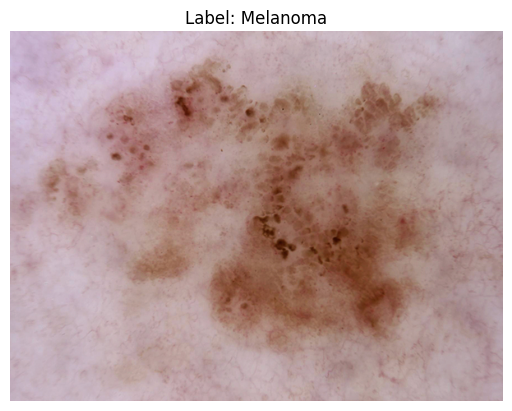

In [104]:
sample_image = Image.open('/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/dataset/archive/HAM10000_images_part_1/ISIC_0025982.jpg')
plt.imshow(sample_image)
plt.title(f"Label: {sample_label}")  # Display the label as the title
plt.axis('off')  # Hide axes
plt.show()


In [105]:
metadata.isnull().sum()

lesion_id        0
image_id         0
cell_type        0
dx_type          0
age             57
sex              0
localization     0
image_path       0
dtype: int64

In [106]:
metadata['age'].fillna((metadata['age'].mean()), inplace=True)

/var/folders/s3/5qv1zj6j4rb1_gv284qz_mh40000gn/T/ipykernel_4459/648827771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  metadata['age'].fillna((metadata['age'].mean()), inplace=True)


In [107]:
metadata.isnull().sum()

lesion_id       0
image_id        0
cell_type       0
dx_type         0
age             0
sex             0
localization    0
image_path      0
dtype: int64

In [108]:
print(metadata.dtypes)

lesion_id        object
image_id         object
cell_type        object
dx_type          object
age             float64
sex              object
localization     object
image_path       object
dtype: object


<Axes: xlabel='cell_type'>

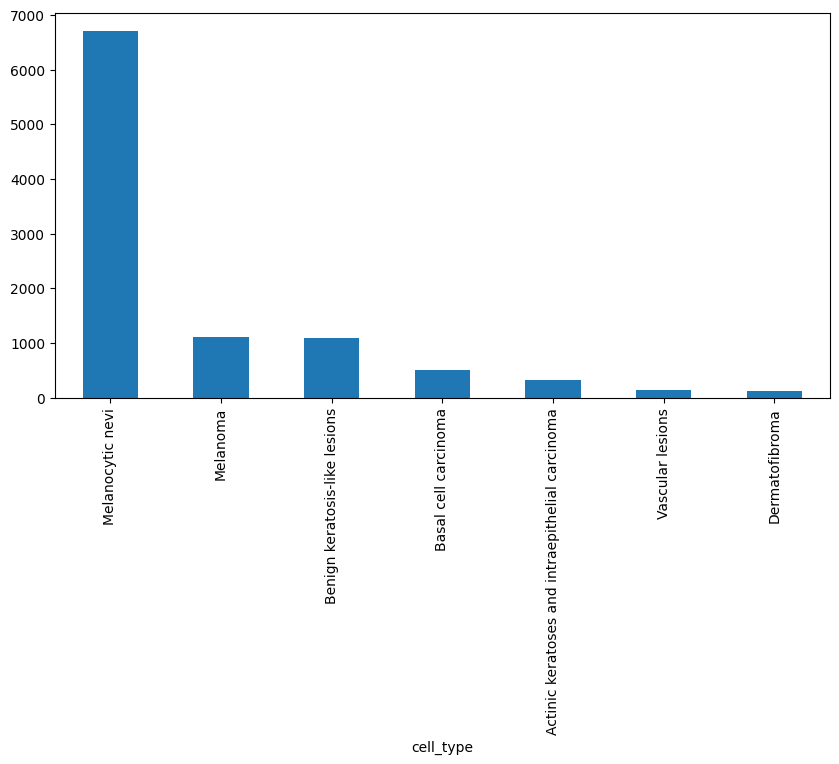

In [109]:
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
metadata['cell_type'].value_counts().plot(kind='bar', ax=ax1)


<Axes: xlabel='dx_type'>

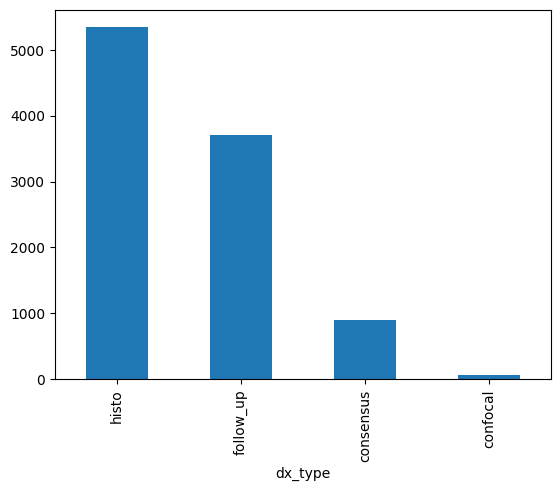

In [110]:
metadata['dx_type'].value_counts().plot(kind = 'bar')

<Axes: xlabel='localization'>

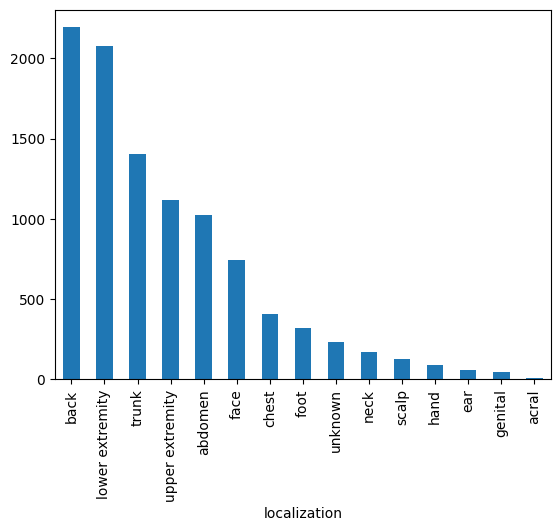

In [111]:
metadata['localization'].value_counts().plot(kind='bar')

<Axes: >

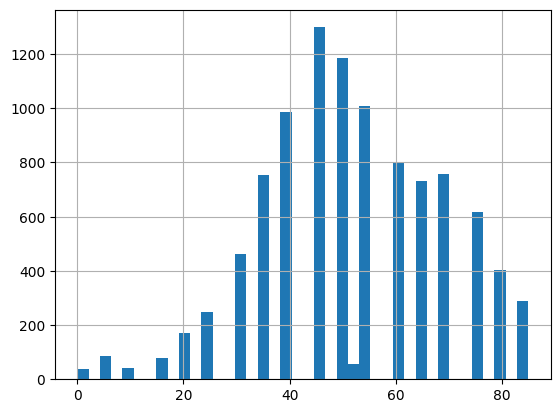

In [112]:
metadata['age'].hist(bins=40)

<Axes: xlabel='sex'>

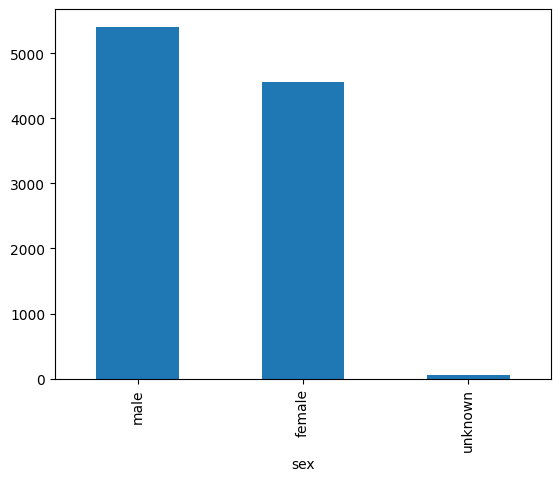

In [113]:
metadata['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='age', ylabel='cell_type'>

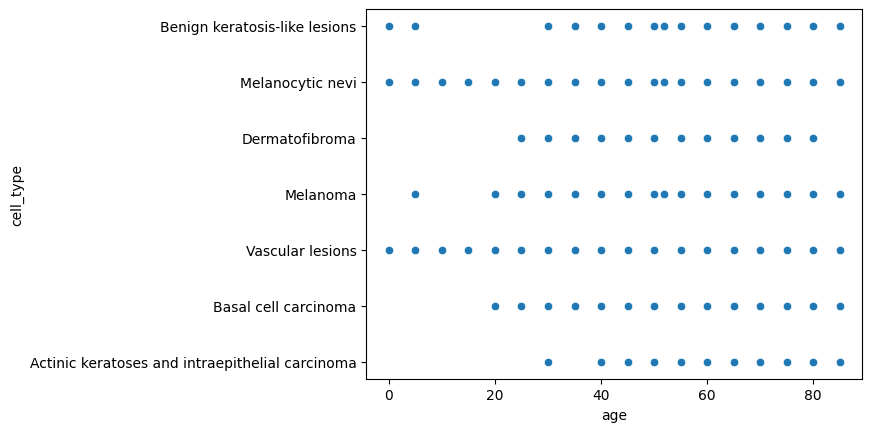

In [114]:
import seaborn as sns
sns.scatterplot(x = 'age', y = 'cell_type',data=metadata)

In [115]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the labels
metadata['cell_type_encoded'] = label_encoder.fit_transform(metadata['cell_type'])

# Update the dataset to use the encoded labels


In [125]:
label_mapping = {
    'Melanoma': 0,
    'Basal cell carcinoma': 1,
    'Melanocytic nevi': 2,
    'Benign keratosis-like lesions': 3,
    'Actinic keratoses and intraepithelial carcinoma': 4,
    'Dermatofibroma': 5,
    'Vascular lesions':6
}
    
    # Add other classes as necessary



In [126]:
class SkinCancerDataset(Dataset):
    def __init__(self, metadata, transform=None):
        self.metadata = metadata
        self.transform = transform
        self.label_mapping = label_mapping  # Use the label mapping

    def __len__(self):
        return len(self.metadata)

    def __getitem__(self, idx):
        img_path = self.metadata.iloc[idx]['image_path']
        label = self.metadata.iloc[idx]['cell_type']  # Original label
        encoded_label = self.label_mapping[label]  # Encode the label
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(encoded_label, dtype=torch.long)  # Return encoded label as a tensor


In [143]:
train_size = int(0.8 * len(metadata))
val_size = len(metadata) - train_size
train_dataset, val_dataset = random_split(metadata, [train_size, val_size])

In [144]:
# Create datasets
train_dataset = SkinCancerDataset(metadata=train_dataset, transform=image_transforms)
val_dataset = SkinCancerDataset(metadata=val_dataset, transform=image_transforms)

# Create DataLoaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7882353..0.4666667].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9372549..0.654902].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.92941177..0.60784316].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137..0.9843137].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.75686276..0.9843137].


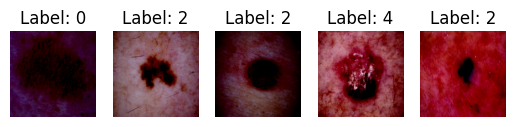

In [139]:
# Display a batch of images and labels
for images, labels in train_dataloader:
    # Display the first 5 images in the batch
    for i in range(5):
        plt.subplot(1, 5, i + 1)  # Create a subplot for each image
        plt.imshow(images[i].permute(1, 2, 0))  # Convert tensor to HWC format for plotting
        plt.title(f'Label: {labels[i].item()}')  # Show the label as title
        plt.axis('off')  # Hide axes
    plt.show()
    break  # Remove this line to iterate through all batches


In [140]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

# Load the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch32-384")
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch32-384", 
    num_labels=7,  # Adjusting for HAM10000 dataset
    ignore_mismatched_sizes=True
)


/Users/binitachhetri/Downloads/CapstoneProject-DiseasePrediction/.venv/lib/python3.11/site-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch32-384 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [133]:
model.train()  # Set the model to training mode
optimizer = AdamW(model.parameters(), lr=5e-5)
criterion = CrossEntropyLoss()
num_epochs = 11
for epoch in range(num_epochs):
    for batch in dataloader:
        images, labels = batch  # Get a batch of images and labels

        optimizer.zero_grad()  # Clear gradients
        outputs = model(images).logits  # Forward pass  
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/11], Loss: 0.4226
Epoch [1/11], Loss: 0.3771


KeyboardInterrupt: 